In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [2]:
from bandit import SampleAverage, ConstantStepSize

# Non-stationary

In [3]:
# Test the action values
k=10
t = 10000
bandit = SampleAverage(k=k, stationary=False)
reward_matrix = bandit.test_action_values(t)

Text(0, 0.5, 'Reward')

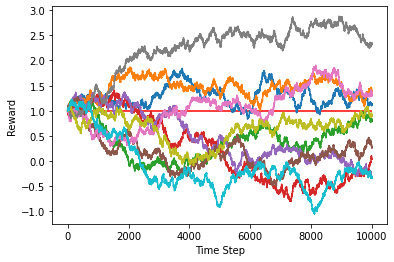

In [4]:
plt.plot(reward_matrix);
plt.hlines(bandit.action_values[0], 0, t, colors="r")
plt.xlabel("Time Step")
plt.ylabel("Reward")

In [5]:
# Define two bandits: normal sample average (with incremental learning rate) and constant step-size averages
bandits = [SampleAverage(k=k, eps=0.1, stationary=False), ConstantStepSize(k=k, eps=0.1, alpha=0.1, stationary=False)]
# Define the run steps (how many steps per run) and the number of independent runs (for averaging purposes)
run_steps = 10000
n_runs = 2000

In [6]:
# Initialize reward matrix and optimal action matrix
output_mat = np.zeros(shape=(run_steps, len(bandits)))
optimal_act = np.zeros(shape=(run_steps, len(bandits)))

# Perform training
for i, bandit in enumerate(bandits):
    for run in tqdm(range(n_runs)):
        bandit.reset()
        actions, rewards, op_actions = bandit.train(run_steps)
        output_mat[:, i] += (1/n_runs)*rewards
        optimal_act[:, i] += (1/n_runs)*np.where(actions==op_actions, 1, 0)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

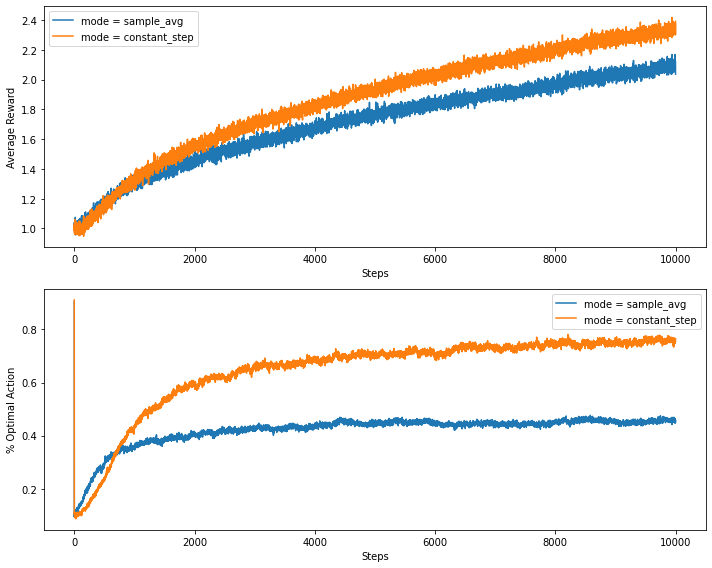

In [7]:
mode_list = ['sample_avg', 'constant_step']
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(10,8));

plot_labels = [f'mode = {mode}' for mode in mode_list]
g = axs[0].plot(output_mat, label=plot_labels)
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Average Reward')
axs[0].legend(handles=g, labels=plot_labels,)

g = axs[1].plot(optimal_act, label=plot_labels)
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('% Optimal Action')
axs[1].legend(handles=g, labels=plot_labels,)

plt.tight_layout()
fig.savefig('exercise_2_5.png', dpi=600)